# Tests on Reproducability of Experiment Results
Tests are conducted on fine-tuning baseline and one example of GPA. The measured performance is the maximum AP@0.5 achieved over all epochs.

## Variance
Measure the variance in each run depending on different training settings for reproducability. The results show that while runs vary greatly, the maximum value across epochs has low variance, which can further be reduced by using a seed.

::add experiments for `deterministic=True`::

[{'bbox_mAP_50': (16.0, 0.858)}, {'bbox_mAP_50': (14.0, 0.853)}, {'bbox_mAP_50': (7.0, 0.852)}, {'bbox_mAP_50': (25.0, 0.85)}, {'bbox_mAP_50': (6.0, 0.852)}, {'bbox_mAP_50': (25.0, 0.855)}, {'bbox_mAP_50': (25.0, 0.855)}, {'bbox_mAP_50': (6.0, 0.852)}, {'bbox_mAP_50': (25.0, 0.86)}]
variance random: 6.8888888888889015e-06
variance seeded: 4.22222222222223e-06
variance seeded + deterministic: 1.0888888888888908e-05


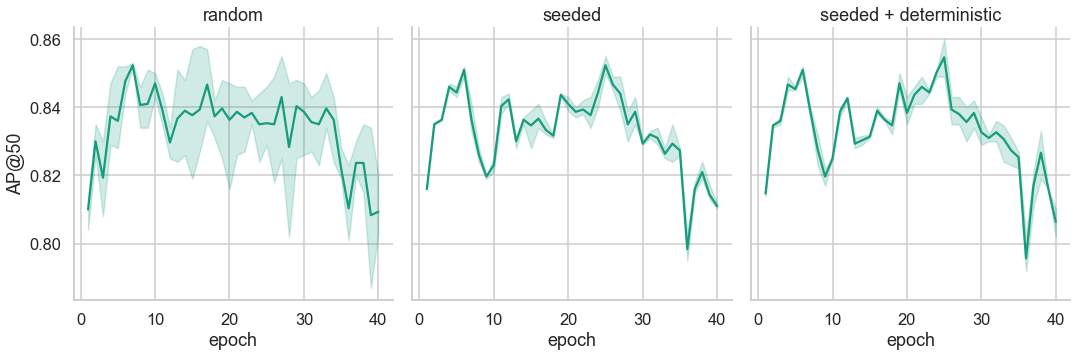

In [1]:
from log_analysis import *

logs = [['individual_results/coco_piropo_100a_ft_80_step40.log', '0', 'random'],
        ['individual_results/coco_piropo_100a_ft_40.1.log', '1', 'random'],
        ['individual_results/coco_piropo_100a_ft_40.2.log', '2', 'random'],
        ['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', '0', 'seeded'],
        ['individual_results/coco_piropo_100a_ft_40_seeded.1.log', '1', 'seeded'],
        ['individual_results/coco_piropo_100a_ft_40_seeded.2.log', '2', 'seeded'],
        ['individual_results/coco_piropo_100aft_40_seeded_det.0.log', '0', 'seeded + deterministic'],
        ['individual_results/coco_piropo_100aft_40_seeded_det.1.log', '1', 'seeded + deterministic'],
        ['individual_results/coco_piropo_100aft_40_seeded_det.2.log', '2', 'seeded + deterministic']]

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())

df, maxs = df_from_log(['i', 'mode'], ['bbox_mAP_50'], logs, get_max=True)

g = sb.relplot(data=df[df['occurrence']<=40], x='occurrence', y='value', col='mode', kind='line')
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template='{col_name}')


print(maxs)
print('variance random:', np.var([m['bbox_mAP_50'][1] for m in maxs[:3]]))
print('variance seeded:', np.var([m['bbox_mAP_50'][1] for m in maxs[3:6]]))
print('variance seeded + deterministic:', np.var([m['bbox_mAP_50'][1] for m in maxs[6:]]))
g.savefig(f'images/meta_intra_split_variance_rand_seed_det.svg')

## Variance across Splits
The seed does little to reduce inter-split variance. We therefore need to know how predictable results are across splits (see below). Making the same argument using absolute performance instead of variance might be more effective.

[{'bbox_mAP_50': (16.0, 0.858)}, {'bbox_mAP_50': (29.0, 0.837)}, {'bbox_mAP_50': (4.0, 0.83)}, {'bbox_mAP_50': (25.0, 0.85)}, {'bbox_mAP_50': (5.0, 0.83)}, {'bbox_mAP_50': (5.0, 0.83)}, {'bbox_mAP_50': (11.0, 0.923)}, {'bbox_mAP_50': (24.0, 0.918)}, {'bbox_mAP_50': (16.0, 0.925)}]
variance random: 0.0001415555555555558
variance seeded: 0.0018692222222222259


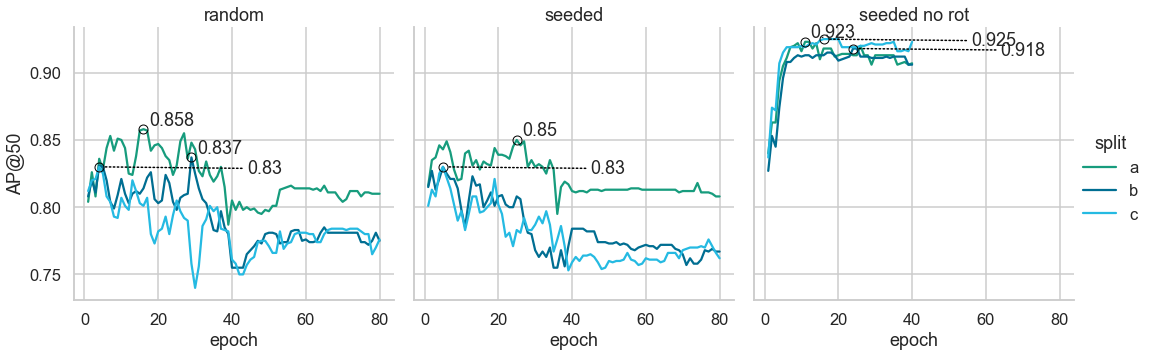

In [11]:
from log_analysis import *

logs = [['individual_results/coco_piropo_100a_ft_80_step40.log', 'a', 'random'],
        ['individual_results/coco_piropo_100b_ft_80_step40.log', 'b', 'random'],
        ['individual_results/coco_piropo_100c_ft_80_step40.log', 'c', 'random'],
        ['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', 'a', 'seeded'],
        ['individual_results/coco_piropo_100b_ft_80_step40_seeded.log', 'b', 'seeded'],
        ['individual_results/coco_piropo_100c_ft_80_step40_seeded.log', 'c', 'seeded'],
        ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', 'a', 'seeded no rot'],
        ['individual_results/coco_piropo_100b_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', 'b', 'seeded no rot'],
        ['individual_results/coco_piropo_100c_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', 'c', 'seeded no rot'],]

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())

df, maxs = df_from_log(['split', 'mode'], ['bbox_mAP_50'], logs, get_max=True)

g = sb.relplot(data=df, x='occurrence', y='value', hue='split', col='mode', kind='line')
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template='{col_name}')

print(maxs)
print('variance random:', np.var([m['bbox_mAP_50'][1] for m in maxs[:3]]))
print('variance seeded:', np.var([m['bbox_mAP_50'][1] for m in maxs[3:]]))
# annotate max
arrow={'arrowstyle': '-' ,'color': 'black', 'ls': 'dotted'}
loc = [[0, 0, 'u'], [0, 0, 'u'], [0, 0, 'd'], [0, 1, 'u'], [0, 1, 'd'], None, [0, 2, 'u'], [0, 2, 'd'], [0, 2, 'd']]
for l, m in zip(loc, maxs):
    if l is not None:
        x = m['bbox_mAP_50'][0]
        y = m['bbox_mAP_50'][1]
        g.axes[l[0]][l[1]].plot(x, y, marker='o', markerfacecolor='none', markeredgecolor='black')
        if l[2] == 'u':
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y), xytext=(x+1.5, y+0.003))
        else:
            g.axes[l[0]][l[1]].annotate(y, xy=(x+0.5, y), xytext=(x+40, y-0.005), arrowprops=arrow)
# g.savefig(f'images/meta_inter_split_variance_rand_seed.svg')

## Predictability across splits
We therefore test whether improvements on one split propagate to other splits, and find that the improvement is consistent.

[{'bbox_mAP_50': (25.0, 0.85)}, {'bbox_mAP_50': (25.0, 0.863)}, {'bbox_mAP_50': (5.0, 0.83)}, {'bbox_mAP_50': (4.0, 0.846)}, {'bbox_mAP_50': (5.0, 0.83)}, {'bbox_mAP_50': (5.0, 0.85)}]
improvements: [0.013000000000000012, 0.016000000000000014, 0.020000000000000018]


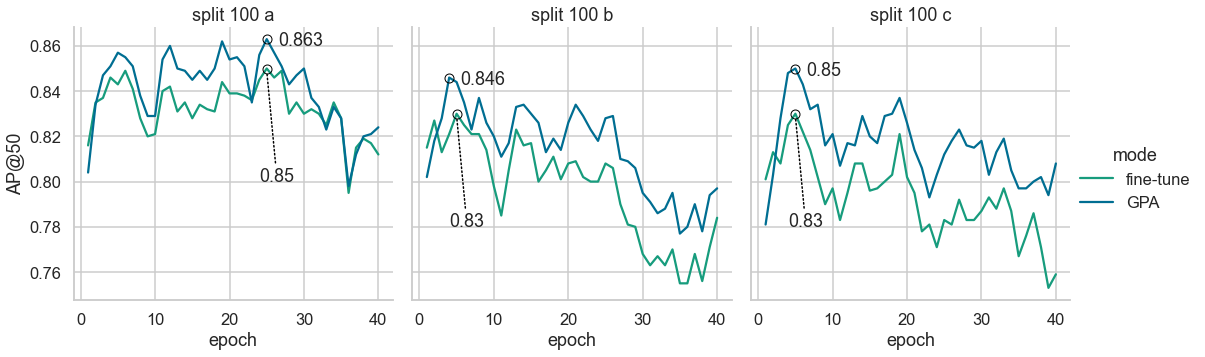

In [3]:
logs = [['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', 'a', 'fine-tune'],
        ['individual_results/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed0.log', 'a', 'GPA'],
        # ['individual_results/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed1.log', 'a', '1', 'GPA'],
        ['individual_results/coco_piropo_100b_ft_80_step40_seeded.log', 'b', 'fine-tune'],
        ['individual_results/coco_piropo_100b_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 'b', 'GPA'],
        ['individual_results/coco_piropo_100c_ft_80_step40_seeded.log', 'c', 'fine-tune'],
        ['individual_results/coco_piropo_100c_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', 'c', 'GPA']]

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())

df, maxs = df_from_log(['split', 'mode'], ['bbox_mAP_50'], logs, get_max=True)

g = sb.relplot(data=df[df['occurrence']<=40], x='occurrence', y='value', hue='mode', col='split', kind='line', height=5, aspect=1.)
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template="split 100 {col_name}", row_template="{row_name}")

print(maxs)
print('improvements:', [maxs[i*2+1]['bbox_mAP_50'][1]-maxs[i*2]['bbox_mAP_50'][1] for i in range(3)])
# annotate max
arrow={'arrowstyle': '-' ,'color': 'black', 'ls': 'dotted'}
loc = [[0,0,'d'], [0,0,'u'], [0,1,'d'], [0,1,'u'], [0,2,'d'], [0,2,'u']]
for l, m in zip(loc, maxs):
    x = m['bbox_mAP_50'][0]
    y = m['bbox_mAP_50'][1]
    if l is not None:
        g.axes[l[0]][l[1]].plot(x, y, marker='o', markerfacecolor='none', markeredgecolor='black')
        if l[2] == 'u':
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y), xytext=(x+1.5, y-0.003))
        else:
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y-0.001), xytext=(x-1, y-0.05), arrowprops=arrow)
g.savefig(f'images/meta_inter_split_consistency_ft_gpa.svg')

## Predictability across splits of different size
We only need to check if these results are consistent across settings, and find that they are. We also find that 40 epochs are more than enough for all settings (assuming a batch-size of 16).

[{'bbox_mAP_50': (9.0, 0.804)}, {'bbox_mAP_50': (10.0, 0.821)}, {'bbox_mAP_50': (11.0, 0.828)}, {'bbox_mAP_50': (20.0, 0.829)}, {'bbox_mAP_50': (25.0, 0.85)}, {'bbox_mAP_50': (25.0, 0.863)}, {'bbox_mAP_50': (30.0, 0.886)}, {'bbox_mAP_50': (6.0, 0.896)}]
improvements: [0.016999999999999904, 0.0010000000000000009, 0.013000000000000012, 0.010000000000000009]


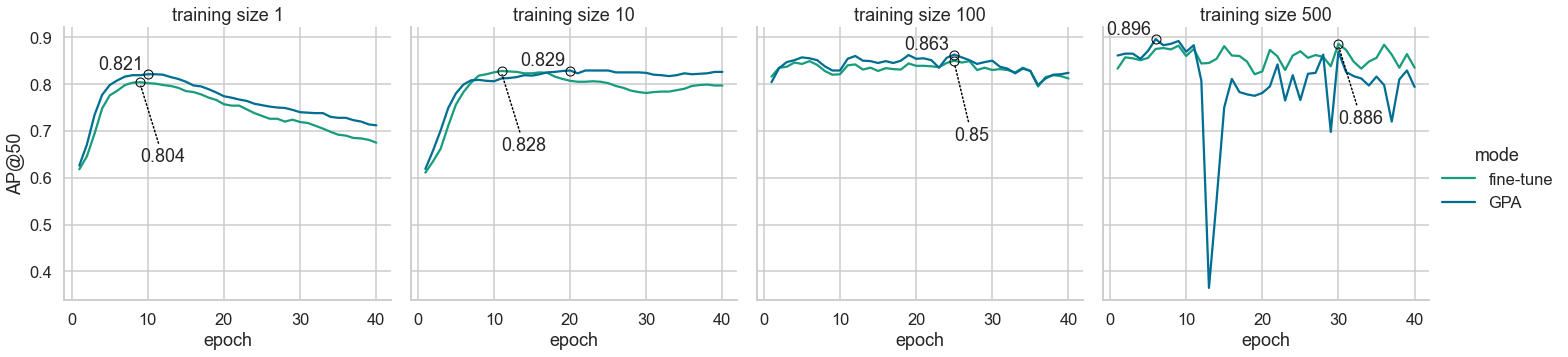

In [4]:
logs = [
        ['individual_results/coco_piropo_1a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', '1', 'fine-tune'],
        ['individual_results/coco_piropo_1a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', '1', 'GPA'],
        ['individual_results/coco_piropo_10a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', '10', 'fine-tune'],
        ['individual_results/coco_piropo_10a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', '10', 'GPA'],
        ['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', '100', 'fine-tune'],
        ['individual_results/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed0.log', '100', 'GPA'],
        ['individual_results/coco_piropo_500a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', '500', 'fine-tune'],
        ['individual_results/coco_piropo_500a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', '500', 'GPA'],
    ]

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())

df, maxs = df_from_log(['split', 'mode'], ['bbox_mAP_50'], logs, get_max=True)

g = sb.relplot(data=df[df['occurrence']<=40], x='occurrence', y='value', hue='mode', col='split', kind='line', height=5, aspect=1.)
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template="training size {col_name}", row_template='')

print(maxs)
print('improvements:', [maxs[i*2+1]['bbox_mAP_50'][1]-maxs[i*2]['bbox_mAP_50'][1] for i in range(4)])
# annotate max
arrow={'arrowstyle': '-' ,'color': 'black', 'ls': 'dotted'}
loc = [[0,0,'d'], [0,0,'u'], [0,1,'d'], [0,1,'u'], [0,2,'d'], [0,2,'u'], [0,3,'d'], [0,3,'u']]
for l, m in zip(loc, maxs):
    x = m['bbox_mAP_50'][0]
    y = m['bbox_mAP_50'][1]
    if l is not None:
        g.axes[l[0]][l[1]].plot(x, y, marker='o', markerfacecolor='none', markeredgecolor='black')
        if l[2] == 'u':
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y), xytext=(x-6.5, y+0.01))
        else:
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y-0.004), xytext=(x, y-0.17), arrowprops=arrow)
g.savefig(f'images/meta_inter_size_consistency_ft_gpa.svg')

# Random Rotation
How many of my experiments need to be redone? Which previous results are still valid?

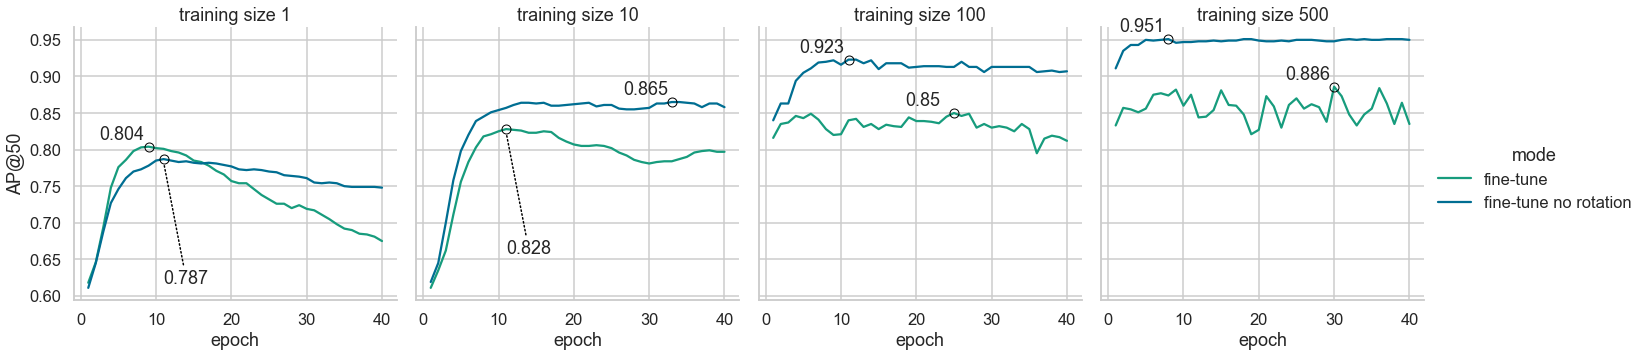

In [20]:
from log_analysis import *

logs = [
    ['individual_results/coco_piropo_1a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', '1', 'fine-tune'],
    # ['individual_results/coco_piropo_1a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', '1', 'GPA'],
    ['individual_results/coco_piropo_1a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', '1', 'fine-tune no rotation'],
    ['individual_results/coco_piropo_10a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', '10', 'fine-tune'],
    # ['individual_results/coco_piropo_10a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', '10', 'GPA'],
    ['individual_results/coco_piropo_10a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', '10', 'fine-tune no rotation'],
    ['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', '100', 'fine-tune'],
    # ['individual_results/coco_piropo_100a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed0.log', '100', 'GPA'],
    ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', '100', 'fine-tune no rotation'],
    # ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_10_01_100_01_fclayer_gTrue_seed_norot.log', '100', 'GPA no rot'],
    ['individual_results/coco_piropo_500a_da0roi0rcnn0intra0inter0nFalsegtFalsemean_squared_seed.log', '500', 'fine-tune'],
    # ['individual_results/coco_piropo_500a_da1roi0rcnn1intra100inter1nFalsegtFalsemean_squared_seed.log', '500', 'GPA'],
    ['individual_results/coco_piropo_500a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', '500', 'fine-tune no rotation'],
    # ['individual_results/coco_piropo_1000a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log', '1000', 'fine-tune no rot'],
]

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())

df, maxs = df_from_log(['split', 'mode'], ['bbox_mAP_50'], logs, get_max=True)

g = sb.relplot(data=df[df['occurrence']<=40], x='occurrence', y='value', hue='mode', col='split', kind='line', height=5, aspect=1.)
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template="training size {col_name}", row_template='')

arrow = {'arrowstyle': '-', 'color': 'black', 'ls': 'dotted'}
loc = [[0, 0, 'u'], [0, 0, 'd'], [0, 1, 'd'], [0, 1, 'u'], [0, 2, 'u'], [0, 2, 'u'], [0, 3, 'u'], [0, 3, 'u']]
for l, m in zip(loc, maxs):
    x = m['bbox_mAP_50'][0]
    y = m['bbox_mAP_50'][1]
    if l is not None:
        g.axes[l[0]][l[1]].plot(x, y, marker='o', markerfacecolor='none', markeredgecolor='black')
        if l[2] == 'u':
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y), xytext=(x - 6.5, y + 0.01))
        else:
            g.axes[l[0]][l[1]].annotate(y, xy=(x, y - 0.004), xytext=(x, y - 0.17), arrowprops=arrow)
g.savefig(f'images/meta_random_rotation_across_sizes.svg')#

[{'bbox_mAP': (2.0, 0.514), 'bbox_mAP_75': (2.0, 0.569), 'bbox_mAP_50': (25.0, 0.859), 'LAMR': (36.0, 0.2777)}, {'bbox_mAP': (26.0, 0.6), 'bbox_mAP_75': (35.0, 0.707), 'bbox_mAP_50': (11.0, 0.923), 'LAMR': (1.0, 0.2044)}]


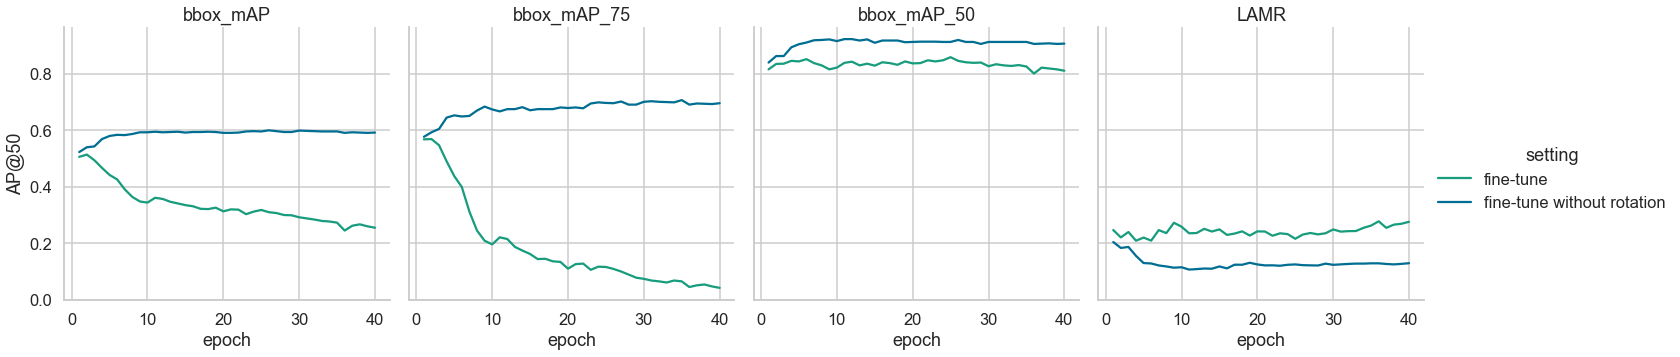

In [21]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())
logs = [
#     ['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', 'fine-tune'],
    ['individual_results/coco_piropo_100a_TwoStageDetector_seed.log', 'fine-tune'],
#     ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed.log', 'fine-tune 2'],
    [
        'individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log',
        'fine-tune without rotation'
    ],
    # ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_10_01_100_01_fclayer_gTrue_seed.1.log', 'ROI 10:0.1 | RCNN 100:0.1'],
    # ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_10_01_100_01_fclayer_gTrue_seed_norot.log', 'ROI 10:0.1 | RCNN 100:0.1 without random rotation'],
    # ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_1_1_1_1_fclayer_gTrue_seed_norot.log', 'ROI 1:1 | RCNN 1:1 without random rotation'],
]

df, maxs = df_from_log(['setting'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50', 'LAMR'],
                       logs,
                       get_max=True)

g = sb.relplot(data=df[df['occurrence'] <= 40],
               x='occurrence',
               y='value',
               kind='line',
               hue='setting',
               col='metric',
               height=5,
               aspect=1.)
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template='{col_name}', row_template='')
print(maxs)
g.savefig(f'images/meta_random_rotation_all_metrics.svg')

[{'bbox_mAP': (26.0, 0.6), 'bbox_mAP_75': (35.0, 0.707), 'bbox_mAP_50': (11.0, 0.923)}, {'bbox_mAP': (8.0, 0.576), 'bbox_mAP_75': (8.0, 0.652), 'bbox_mAP_50': (8.0, 0.909)}, {'bbox_mAP': (31.0, 0.596), 'bbox_mAP_75': (38.0, 0.686), 'bbox_mAP_50': (13.0, 0.926)}]


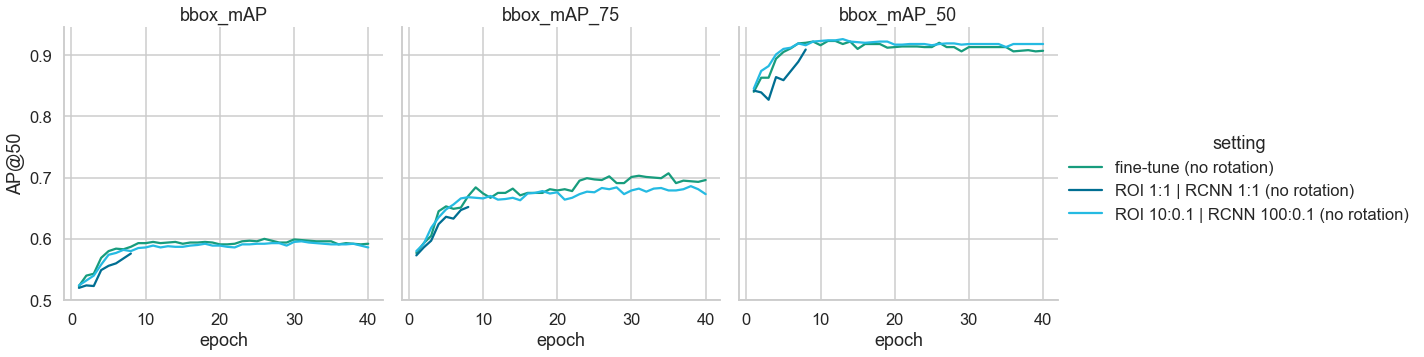

In [23]:
from log_analysis import *

sb.set_context('talk')
sb.set_style('whitegrid')
sb.set_palette(default())
logs = [
    #     ['individual_results/coco_piropo_100a_ft_80_step40_seeded.log', 'fine-tune'],
    # ['individual_results/coco_piropo_100a_TwoStageDetector_seed.log', 'fine-tune'],
    #     ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed.log', 'fine-tune 2'],
    [
        'individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_0_0_0_0_fclayer_gTrue_seed_norot.log',
        'fine-tune (no rotation)'
    ],
    # ['individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_10_01_100_01_fclayer_gTrue_seed.1.log', 'ROI 10:0.1 | RCNN 100:0.1'],
    [
        'individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_1_1_1_1_fclayer_gTrue_seed_norot.log',
        'ROI 1:1 | RCNN 1:1 (no rotation)'
    ],
    [
        'individual_results/coco_piropo_100a_TwoStageDetectorAdaptive_10_01_100_01_fclayer_gTrue_seed_norot.log',
        'ROI 10:0.1 | RCNN 100:0.1 (no rotation)'
    ],
]

df, maxs = df_from_log(['setting'], ['bbox_mAP', 'bbox_mAP_75', 'bbox_mAP_50'],
                       logs,
                       get_max=True)

g = sb.relplot(data=df[df['occurrence'] <= 40],
               x='occurrence',
               y='value',
               kind='line',
               hue='setting',
               col='metric',
               height=5,
               aspect=1.)
g.set_axis_labels('epoch', 'AP@50')
g.set_titles(col_template='{col_name}', row_template='')
print(maxs)
g.savefig(f'images/meta_random_rotation_gpa_all_metrics.svg')